<a href="https://colab.research.google.com/github/ewondare/book_summaries/blob/main/Summarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()


Saving data.csv to data.csv


In [3]:
import pandas as pd
filename = next(iter(uploaded))
df = pd.read_csv(filename)
df.head(2)

,id,name,author,publish_year,summary,genre_names
0,620,Animal Farm,George Orwell,1945.0,"Old Major, the old boar on the Manor Farm, ca...","['Roman clef', 'Satire', ""Children's literatu..."
1,843,A Clockwork Orange,Anthony Burgess,1962.0,"Alex, a teenager living in near-future Englan...","['Science Fiction', 'Novella', 'Speculative fi..."


## Extractive method
Extractive summarization algorithms are employed to generate a summary by selecting and combining key passages from the source material. Unlike humans, these models emphasize creating the most essential sentences from the original text rather than generating new ones.
Extractive summarization utilizes the Text Rank algorithm, which is highly suitable for text summarization tasks.



In [ ]:
!pip install spacy

In [ ]:
# english language dependancy
!python3 -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
!pip install pytextrank

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.5 MB/s eta 0:00:00


In [4]:
df.rename(columns={'summary' : 'description'} , inplace=True)

In [ ]:
import spacy
import pytextrank

/usr/local/lib/python3.10/dist-packages


In [ ]:
nlp = spacy.load("en_core_web_lg")
nlp.add_pipe("textrank")

def summarize_text(txt):
    example_text = txt
    doc = nlp(example_text)


    summarized_sentences = [str(sent) for sent in doc._.textrank.summary(limit_phrases=3, limit_sentences=3)]
    summarized_text = ' '.join(summarized_sentences)

    return summarized_text


In [ ]:
for index,row in df.iterrows():
  df.at[index , 'summary'] = summarize_text(row['description'])

In [ ]:
df

,id,name,author,publish_year,description,genre_names,summary
0,620,Animal Farm,George Orwell,1945.0,"Old Major, the old boar on the Manor Farm, ca...","['Roman clef', 'Satire', ""Children's literatu...","Once Snowball becomes a scapegoat, Napoleon be..."
1,843,A Clockwork Orange,Anthony Burgess,1962.0,"Alex, a teenager living in near-future Englan...","['Science Fiction', 'Novella', 'Speculative fi...",After Alex's fellow cellmates blame him for be...
2,986,The Plague,Albert Camus,1947.0,The text of The Plague is divided into five p...,"['Existentialism', 'Fiction', 'Absurdist ficti...","When the daily number of deaths jumps to 30, t..."
3,1756,An Enquiry Concerning Human Understanding,David Hume,NaN,The argument of the Enquiry proceeds by a ser...,NaN,"After expounding his epistemology, Hume explai..."
4,2080,A Fire Upon the Deep,Vernor Vinge,1981.0,The novel posits that space around the Milky ...,"['Hard science fiction', 'Science Fiction', 'S...","The expedition's facility, called High Lab, is..."
...,...,...,...,...,...,...,...
16554,36934824,Under Wildwood,Colin Meloy,2012.0,"Prue McKeel, having rescued her brother from ...",NaN,With Wildwood once again under threat by dark ...
16555,37054020,Transfer of Power,Vince Flynn,2000.0,The reader first meets Rapp while he is doing...,"['Thriller', 'Fiction']","Meanwhile in Washington, D.C., Anna Reilly is ..."
16556,37122323,Decoded,Jay-Z,2010.0,The book follows very rough chronological ord...,['Autobiography'],The book follows very rough chronological ord...
16557,37132319,America Again: Re-becoming The Greatness We Ne...,Stephen Colbert,2012.0,Colbert addresses topics including Wall Stree...,NaN,Colbert addresses topics including Wall Stree...


Cosine Similarity
You can compute the cosine similarity between the TF-IDF vectors of the 'summary' and 'description' columns to evaluate how similar they are.

In [ ]:
df1 = df[['id' , 'summary']]

In [ ]:
df1

,id,summary
0,620,"Once Snowball becomes a scapegoat, Napoleon be..."
1,843,After Alex's fellow cellmates blame him for be...
2,986,"When the daily number of deaths jumps to 30, t..."
3,1756,"After expounding his epistemology, Hume explai..."
4,2080,"The expedition's facility, called High Lab, is..."
...,...,...
16554,36934824,With Wildwood once again under threat by dark ...
16555,37054020,"Meanwhile in Washington, D.C., Anna Reilly is ..."
16556,37122323,The book follows very rough chronological ord...
16557,37132319,Colbert addresses topics including Wall Stree...


In [ ]:
import pandas as pd
from google.colab import files
df.to_csv('summary_extractive.csv')
files.download('summary_extractive.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.to_csv('summary_extractive_only.csv')
files.download('summary_extractive_only.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.tail()

,id,name,author,publish_year,description,genre_names,summary
16554,36934824,Under Wildwood,Colin Meloy,2012.0,"Prue McKeel, having rescued her brother from ...",NaN,With Wildwood once again under threat by dark ...
16555,37054020,Transfer of Power,Vince Flynn,2000.0,The reader first meets Rapp while he is doing...,"['Thriller', 'Fiction']","Meanwhile in Washington, D.C., Anna Reilly is ..."
16556,37122323,Decoded,Jay-Z,2010.0,The book follows very rough chronological ord...,['Autobiography'],The book follows very rough chronological ord...
16557,37132319,America Again: Re-becoming The Greatness We Ne...,Stephen Colbert,2012.0,Colbert addresses topics including Wall Stree...,NaN,Colbert addresses topics including Wall Stree...
16558,37159503,Poor Folk,Fyodor Dostoyevsky,1846.0,Makar Devushkin and Varvara Dobroselova are s...,"['Epistolary novel', 'Speculative fiction']",Makar Devushkin and Varvara Dobroselova are s...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def evaluate_cosine_similarity(df):
    similarities = []
    vectorizer = TfidfVectorizer()

    for index, row in df.iterrows():
        tfidf_matrix = vectorizer.fit_transform([row['description'], row['summary']])
        similarity = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])
        similarities.append(similarity[0][0])

    return similarities

cosine_scores = evaluate_cosine_similarity(df)
print(cosine_scores)


[0.7781282184047887, 0.6431593678487887, 0.6939273467294216, 0.5188044526655217, 0.7705490292548922, 0.6407198015446152, 0.6037969897192897, 0.6320077634642085, 1.0000000000000002, 0.8074484216816465, 0.888127391617016, 0.8764797477617696, 0.8608791436502442, 0.7450005502539137, 0.694573314256702, 0.7424175216675096, 0.7292596884198035, 0.6643301220689233, 0.3869437566585643, 0.9344698681445118, 0.9438727698469118, 0.60338378882999, 0.7131253855207965, 0.8114701507937079, 0.629682368837213, 0.7740948293471426, 0.7690828644298788, 0.713982614274262, 0.8299744440882864, 0.7629479071897599, 0.5265323407829489, 0.6548976786466073, 0.5123304450094461, 0.6995123252506699, 0.5045091867400624, 0.548128848032471, 0.563273750853016, 0.7102359601855941, 0.7947296119359142, 0.723058260784026, 0.535748939851151, 0.39076231125575617, 0.6450328379830502, 0.6057110910227592, 0.6631375017370419, 0.5604010910969202, 0.6297359943713646, 0.5971281147320215, 0.9999999999999997, 0.7403374745356023, 0.604774

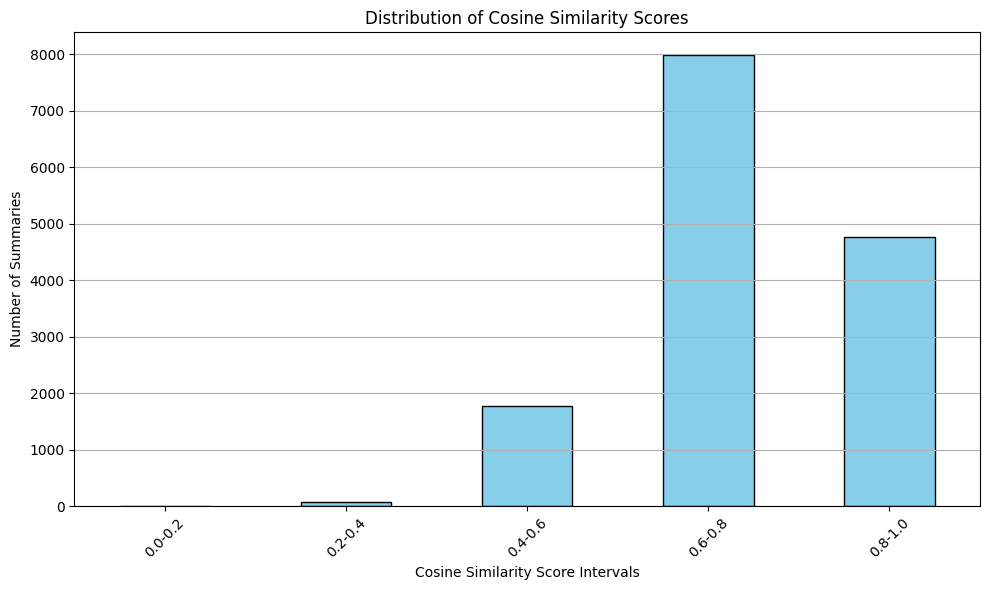

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

bins = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels = ['0.0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0']

score_categories = pd.cut(cosine_scores, bins=bins, labels=labels, right=False)
score_counts = score_categories.value_counts().sort_index()

plt.figure(figsize=(10, 6))
score_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Cosine Similarity Scores')
plt.xlabel('Cosine Similarity Score Intervals')
plt.ylabel('Number of Summaries')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


(-1.099999776208893,
 1.0999999496445567,
 -1.0999992117625246,
 1.0999999624648822)

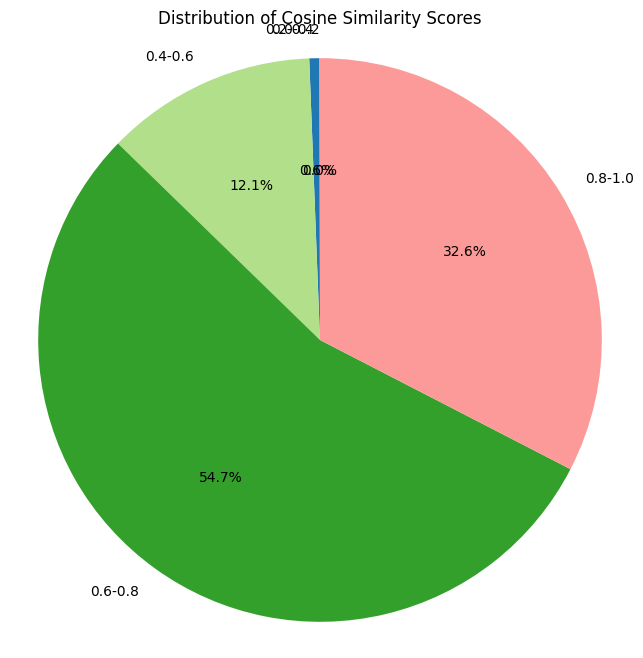

In [ ]:
bins = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels = ['0.0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0']

score_categories = pd.cut(cosine_scores, bins=bins, labels=labels, right=False)
score_counts = score_categories.value_counts()
plt.figure(figsize=(8, 8))
plt.pie(score_counts, labels=score_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Cosine Similarity Scores')
plt.axis('equal')  #


In [ ]:
!pip install rouge


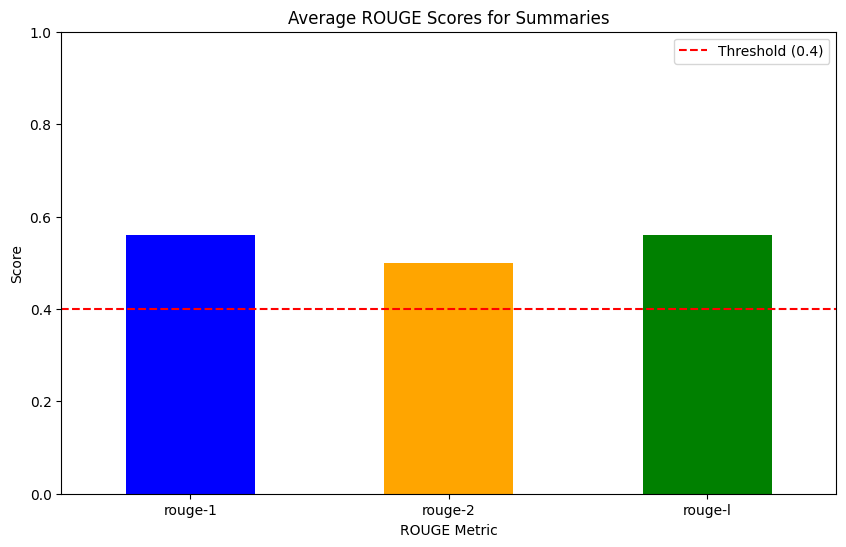

Average ROUGE Scores:
rouge-1    0.559248
rouge-2    0.498573
rouge-l    0.559073
dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from rouge import Rouge

rouge = Rouge()

def evaluate_summaries(df):
    scores = []
    for index, row in df.iterrows():
        actual = row['description']
        generated = row['summary']
        score = rouge.get_scores(generated, actual)[0]
        # Extract the ROUGE scores from the dictionary
        scores.append({
            'rouge-1': score['rouge-1']['f'],
            'rouge-2': score['rouge-2']['f'],
            'rouge-l': score['rouge-l']['f']
        })
    return scores

evaluation_scores = evaluate_summaries(df)
scores_df = pd.DataFrame(evaluation_scores)
average_scores = scores_df.mean()

plt.figure(figsize=(10, 6))
average_scores[['rouge-1', 'rouge-2', 'rouge-l']].plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Average ROUGE Scores for Summaries')
plt.ylabel('Score')
plt.xlabel('ROUGE Metric')
plt.ylim(0, 1)  # ROUGE scores are between 0 and 1
plt.axhline(y=0.4, color='r', linestyle='--', label='Threshold (0.4)')
plt.legend()
plt.xticks(rotation=0)
plt.show()

print("Average ROUGE Scores:")
print(average_scores[['rouge-1', 'rouge-2', 'rouge-l']])


## Abstractive method:
Abstractive summarization techniques emulate human writing by generating entirely new sentences to convey key concepts from the source text, rather than merely rephrasing portions of it. These fresh sentences distill the vital information while eliminating irrelevant details, often incorporating novel vocabulary absent in the original text. The term “Transformers” has recently dominated the natural language processing field, although these models initially relied on designs based on recurrent neural networks (RNNs).

In [ ]:
pip install pandas transformers torch


In [5]:
import pandas as pd
from transformers import BartForConditionalGeneration, BartTokenizer

model_name = 'facebook/bart-large-cnn'
tokenizer = BartTokenizer.from_pretrained(model_name)
model = BartForConditionalGeneration.from_pretrained(model_name)


def summarize_text(text):
    inputs = tokenizer.encode("summarize: " + text, return_tensors="pt", max_length=1024, truncation=True)
    summary_ids = model.generate(inputs, max_length=77, min_length=30, length_penalty=2.0, num_beams=4, early_stopping=True)
    return tokenizer.decode(summary_ids[0], skip_special_tokens=True)





/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

In [6]:
df.loc[:99, 'summarized_abs'] = df.loc[:99, 'description'].apply(summarize_text)

KeyboardInterrupt: 

In [ ]:
df.loc[100:199, 'summarized_abs'] = df.loc[100:199, 'description'].apply(summarize_text)

In [ ]:
df['summarized_abs'] = df['description'].apply(summarize_text)

In [ ]:
pip install transformers torch scikit-learn


ERROR: Operation cancelled by user


In [ ]:
from datasets import load_metric

rouge = load_metric("rouge")
results = rouge.compute(predictions=df['generated_summary'], references=df['desciption'])

print("ROUGE-1:", results['rouge1'].mid.fmeasure)
print("ROUGE-2:", results['rouge2'].mid.fmeasure)
print("ROUGE-L:", results['rougeL'].mid.fmeasure)




ModuleNotFoundError: No module named 'datasets'